# **Derma AI: Skin Disease Image Classifier for Accurate and Accessible Diagnosis**

# **Business Understanding**

## **_Overview_**

A skin disease is a medical condition that affects the skin's appearance, texture, and function. Skin diseases can range from mild conditions, such as acne or a rash, to more serious conditions, such as psoriasis, eczema, or skin cancer. Skin diseases can affect people of all ages, races, and genders. They can be caused by a variety of factors, including genetics, exposure to irritants or allergens, infections, hormonal imbalances, and autoimmune disorders.Symptoms of skin diseases can vary widely depending on the specific condition, but may include redness, swelling, itching, dryness, scaling, blistering, or changes in skin color or texture.<br>
Proper diagnosis and treatment of skin diseases is crucial for maintaining healthy skin and preventing complications. Early diagnosis is particularly important as it can prevent permanent scarring, disfigurement, and even life-threatening conditions such as skin cancer. Additionally, early diagnosis can help prevent the spread of infectious skin diseases such as bacterial or viral infections. The use of skin disease classification tools can aid in the early and accurate diagnosis of skin diseases, leading to improved outcomes and better overall health for patients.<br>
This project aims to develop a skin disease image classifier that can identify skin diseases in images uploaded by users.  The classifier will be integrated into a website where users can upload photos of their skin diseases and receive an accurate diagnosis. The machine learning algorithm used in the  project will utilise a dataset of images scraped from the [DermNet NZ Image Library](https://dermnetnz.org/image-library) and [ISIC 2019 Challenge](https://challenge.isic-archive.com/data/#2019) websites.

## **_Business Problem_**

Skin diseases are common and can have significant impacts on a person's health and quality of life. However, patients may struggle to access dermatological expertise due to various reasons, such as lack of dermatologists in some areas, long wait times for appointments, and high costs associated with consultations, while dermatologists face the challenge of accurately identifying and diagnosing skin diseases quickly. To address these challenges, we propose building an AI-powered skin disease classifier that improves diagnosis accuracy and accessibility for both dermatologists and patients.<br>
By leveraging Neural Network techniques and the vast collection of clinical images of skin diseases available on  [DermNet NZ Image Library](https://dermnetnz.org/image-library) and [ISIC 2019 Challenge](https://challenge.isic-archive.com/data/#2019), we can build a skin disease classifier that accurately identifies and classifies skin diseases in a matter of seconds. This can aid dermatologists in their clinical decision-making process and reduce the time it takes to diagnose skin diseases, leading to better patient outcomes. Furthermore, patients can use the classifier to self-diagnose their skin diseases and seek medical attention if needed, thus increasing accessibility and affordability of dermatological care. Ultimately, our goal is to improve the diagnosis and management of skin diseases, leading to better patient outcomes and reduced healthcare costs.

## **_Objectives_**

### **_General Objective_**

To develop a skin disease image classifier using neural networks to accurately diagnose and classify skin diseases.




### **_Specific Objectives_**


**_i._** To develop an advanced skin disease image classifier capable of accurately identifying the most common skin conditions.

**_ii._** To integrate the image classifier into a user-friendly platform that provides patients with convenient and affordable access to dermatological care.

**_iii._** To enhance the speed and accuracy of skin disease diagnosis for both dermatologists and patients, resulting in better treatment outcomes.

To achieve the objectives of this study, the project will seek to answer the following questions:

**_i._** What are the most common skin diseases and how can they be accurately diagnosed through image classification?

**_ii._** How can the developed image classifier be integrated into a user-friendly website to provide accessible dermatological care?

**_iii._** How can the developed image classifier aid dermatologists in their clinical decision-making process and reduce the time it takes to diagnose skin diseases?


## **_Success Criteria_**

The model will be considered a success if it achieves a high accuracy in classifying skin diseases. Accuracy is a measure of how many predictions are correct out of the total number of predictions made by the classifier. A high accuracy score indicates that the classifier is good at avoiding misclassifications, which is crucial in the case of skin disease classification as misdiagnosis can lead to unnecessary treatments or interventions.

In addition to accuracy, the F1 score will be considered as a secondary metric. A high F1 score indicates that the classifier has a good balance between precision and recall, which is important in the case of skin disease classification as it ensures that the classifier is both accurate and comprehensive in its predictions.

# **Data Understanding**

The data that will be used in this project will be scraped from [DermNet NZ Image Library](https://dermnetnz.org/image-library) and [ISIC 2019 Challenge](https://challenge.isic-archive.com/data/#2019) websites.

# **Data Scrapping**

In [ ]:
# install required libraries
!pip install selenium
!pip install webdriver_manager


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


**import required libraries**

In [ ]:
# import required libraries
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.support.ui import WebDriverWait
import pandas as pd
import re
import time
from IPython.core.display import HTML
import webbrowser
import requests as rq
import os
import pathlib
import pandas as pd

**Scraping Dermnet website**


In [ ]:
# Creating an instance of the Chrome web browser
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# URL to the dermnet website
url = "https://dermnetnz.org/image-library"

# Navigating to the specified url in chrome
driver.get(url)

# maximizing the browser window so that it takes up the entire screen
driver.maximize_window()

[WDM] - Downloading: 100%|██████████| 6.80M/6.80M [00:02<00:00, 3.24MB/s]


In [ ]:
# Finding all the skin_disorders listed on the main page
skin_disorder_tag_main_page = driver.find_elements("xpath", '//a[@class="imageList__group__item"]')

# For loop to extract the skin disorder names and the link to the skin_disorders
disorder_names = []
link_list= []
for tag in skin_disorder_tag_main_page:
    disorder_names.append(tag.text)
    link_list.append(tag.get_attribute("href"))

# Previewing the lists created:
print(f'The first 10 skin condition names: \n {disorder_names[:10]}\n')
print(f'The first 10 links to skin condition image links:\n{link_list[:10]}')

The first 10 skin condition names: 
 ['Acne affecting the back images', 'Acne affecting the face images', 'Acne and other follicular disorder images', 'Acquired dermal macular hyperpigmentation images', 'Acral lentiginous melanoma images', 'Actinic keratosis affecting the face images', 'Actinic keratosis affecting the hand images', 'Actinic keratosis affecting the legs and feet images', 'Actinic keratosis affecting the scalp images', 'Actinic keratosis dermoscopy images']

The first 10 links to skin condition image links:
['https://dermnetnz.org/topics/acne-affecting-the-back-images/?stage=Live', 'https://dermnetnz.org/topics/acne-face-images/?stage=Live', 'https://dermnetnz.org/image-catalogue/acne-and-other-follicular-disorder-images/?stage=Live', 'https://dermnetnz.org/topics/acquired-dermal-macular-hyperpigmentation-images/?stage=Live', 'https://dermnetnz.org/topics/acral-lentiginous-melanoma-images/?stage=Live', 'https://dermnetnz.org/topics/actinic-keratosis-face-images/?stage=Li

In [ ]:
# The number of skin_disorders listed in the website
print(f'The are {len(disorder_names)} skin conditions listed in the DermNet website.')

The are 294 skin conditions listed in the DermNet website.


In [ ]:
# Creating a dataframe with two columns, the skin_disorder names and the links to the images of the skin disorders
name_link_df = pd.DataFrame({'skin_disorder_name': disorder_names, 'link': link_list})

# Saving the dataframe as a csv file
name_link_df.to_csv('Data/name_link.csv', index=False)

# Previewing the first five rows of the dataframe
name_link_df.head()

,skin_disorder_name,link
0,Acne affecting the back images,https://dermnetnz.org/topics/acne-affecting-th...
1,Acne affecting the face images,https://dermnetnz.org/topics/acne-face-images/...
2,Acne and other follicular disorder images,https://dermnetnz.org/image-catalogue/acne-and...
3,Acquired dermal macular hyperpigmentation images,https://dermnetnz.org/topics/acquired-dermal-m...
4,Acral lentiginous melanoma images,https://dermnetnz.org/topics/acral-lentiginous...


In [ ]:
# initialize the webdriver
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

# create an empty list to store the dataframes for each link/disease pair
dfs = []
# loop through each link/disease pair
for link, disease_name in zip(link_list, disorder_names):
    # create an empty list to store the image URLs
    image_disease = []

    try:
        # navigate to the link
        driver.get(link)

        # maximize the window to ensure all elements are visible
        driver.maximize_window()

        # find all the elements on the page with the class "imageLinkBlock__item__image"
        skin_image_disorder = driver.find_elements("xpath", '//div[@class="imageLinkBlock__item__image"]')

        # loop through each element and find all the images within it
        for image in skin_image_disorder:
            list_ = image.find_elements("tag name", "img")
            for lists in list_:
                # add each image URL to the image_disease list
                image_disease.append(lists.get_attribute("src"))

        # create a list of dictionaries, where each dictionary represents a row in the DataFrame
        # each dictionary contains an image URL and the disease name
        rows = [{'skin_disorder_name': disease_name, 'images': url} for url in image_disease]

        # create the DataFrame using the list of dictionaries
        df = pd.DataFrame(rows, columns=['skin_disorder_name', 'images'])

        # add the dataframe to the list of dataframes
        dfs.append(df)

    except Exception as e:
        # if an error occurs, print the error message and move to the next link/disease pair
        print(f"Error occurred for {disease_name}: {str(e)}")
        continue

# concatenate all the dataframes into a single dataframe
result_df = pd.concat(dfs)

# Turning all the skin_disorder_names to lower case:
result_df['skin_disorder_name'] = result_df['skin_disorder_name'].map(lambda x: x.lower())

# save the result dataframe to a CSV file named "data.csv"
result_df.to_csv('Data/data1-294.csv', index=False)

In [ ]:
# DataFrame with all the 294 images:
image_df = pd.read_csv('Data/data1-294.csv')

# Previewing the first 3 rows of the dataframe
image_df.head(3)

,skin_disorder_name,images
0,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...
1,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...
2,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...


In [ ]:
# Function takes in the image url and returns an html <img> tag that displays the image
def to_img_tag(path):
    return '<img src="'+ path + '" width="50" >'

In [ ]:
# Save the HTML table to a file
with open('Data/image_table.html', 'w') as f:
    f.write(image_df.to_html(escape=False,formatters=dict(images=to_img_tag)))

In [ ]:
# Open the HTML file in the default web browser
webbrowser.open('Data/image_table.html')

True

In [ ]:
# Downloading and Saving the images into a folder:
def save_image(folder: str, name: str, url: str, index:int):
    # Get the data from the url
    image_source = rq.get(url)

    # If there's a suffix, we will grab that
    suffix = pathlib.Path(url).suffix

    # Check if the suffix is one of the following
    if suffix not in ['.jpg', '.jpeg', '.png', '.gif']:
        # Default to .png
        output = name + str(index) + '.png'

    else:
        output = name + str(index) + suffix

    # Check first if folder exists, else create a new one
    if not os.path.exists(folder):
        os.makedirs(folder)

    # Create our output in the specified folder (wb = write bytes)
    with open(f'{folder}{output}', 'wb') as file:
        file.write(image_source.content)
        print(f'Successfully downloaded: {output}')


if __name__ == '__main__':
    # Load the dataframe with image urls and disease names
    df = pd.read_csv('Data/data1-294.csv')

    # Loop through the dataframe
    for index, row in df.iterrows():
        # Get the image url and disease name
        image_url = row['images']
        disease_name = row['skin_disorder_name']

        # Save the image
        save_image('Images/', disease_name, image_url, index)

Successfully downloaded: acne affecting the back images0.jpg
Successfully downloaded: acne affecting the back images1.jpg
Successfully downloaded: acne affecting the back images2.jpg
Successfully downloaded: acne affecting the back images3.jpg
Successfully downloaded: acne affecting the back images4.jpg
Successfully downloaded: acne affecting the back images5.jpg
Successfully downloaded: acne affecting the back images6.jpg
Successfully downloaded: acne affecting the back images7.jpg
Successfully downloaded: acne affecting the back images8.jpg
Successfully downloaded: acne affecting the back images9.jpg
Successfully downloaded: acne affecting the back images10.jpg
Successfully downloaded: acne affecting the back images11.jpg
Successfully downloaded: acne affecting the back images12.jpg
Successfully downloaded: acne affecting the back images13.jpg
Successfully downloaded: acne affecting the back images14.jpg
Successfully downloaded: acne affecting the back images15.jpg
Successfully downl

# **Data Cleaning**

In [ ]:
# import required libraries
import shutil
import os
from PIL import Image
import imagehash
import random

In [ ]:
# load and preview dataset
image_df = pd.read_csv('Data/data1-294.csv')
print(image_df.shape)
image_df.head()

(13992, 2)


,skin_disorder_name,images
0,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...
1,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...
2,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...
3,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...
4,acne affecting the back images,https://dermnetnz.org/assets/Uploads/acne/acne...


### **<u>Acne</u>**

**Meaning**<br>
Acne is a common skin condition that occurs when hair follicles become clogged with oil and dead skin cells. This leads to the formation of pimples, blackheads, whiteheads, and sometimes deeper cysts. Acne usually appears on the face, neck, chest, back, and shoulders, and can affect people of all ages, although it is most common during puberty.<br>

**Causes**<br>
The causes of acne are multifactorial and can include hormonal imbalances, genetics, stress, certain medications, and an overproduction of sebum, the oily substance that lubricates the skin. Certain factors such as diet and hygiene practices have also been implicated in the development of acne, although the evidence for these is less clear.<br>

**Symptoms**<br>
The symptoms of acne can vary depending on the severity of the condition. Mild acne may only present with a few blackheads or whiteheads, while moderate acne can involve a combination of pimples, blackheads, and whiteheads. Severe acne may include deep, painful cysts that can lead to scarring. Acne can also have a significant impact on a person's self-esteem and mental health, particularly if it is severe or persistent.

**Treatment**<br>
Treatment options for acne depend on the severity of the condition. Mild acne can often be managed with over-the-counter topical treatments that contain benzoyl peroxide or salicylic acid. These products work by reducing the amount of oil on the skin and unclogging pores. More severe acne may require prescription medications, such as topical retinoids or oral antibiotics, which can help to reduce inflammation and kill the bacteria that cause acne. In cases of severe, persistent acne, isotretinoin, a powerful oral medication, may be prescribed. Additionally, lifestyle modifications such as maintaining good hygiene practices, avoiding certain foods, and managing stress can also be helpful in managing acne.


#### **Cleaning Acne images**

**i. Moving acne images in the Images folder to their own folder**

In [ ]:
# Labels representing acne in DermNet's scrapped data
acne_labels = list(image_df[image_df['skin_disorder_name'].str.contains('acne')]['skin_disorder_name'].unique())

# removing acne labels whose images will not be used because there are not clear
acne_labels.remove('infantile acne images')
acne_labels.remove('steroid acne images')

acne_labels

['acne affecting the back images',
 'acne affecting the face images',
 'acne and other follicular disorder images',
 'facial acne images']

In [ ]:
# Getting the acne images file names
original_acne_img = [image_name for image_name in os.listdir('Images/') \
                     if ('acne affecting the back images' in image_name) |\
                        ('acne affecting the face images' in image_name) |\
                        ('acne and other follicular disorder images' in image_name) |\
                        ('facial acne images' in image_name)
                        ]

# Confirming the number of acne images before any cleaning
print('There are', len(original_acne_img),'acne images')
original_acne_img[:5]

There are 702 acne images


['acne affecting the back images0.jpg',
 'acne affecting the back images1.jpg',
 'acne affecting the back images10.jpg',
 'acne affecting the back images11.jpg',
 'acne affecting the back images12.jpg']

In [ ]:
# Creating a new folder with just acne images to make cleaning easier
folder_name = 'cleaned_images/acne_images/'

# Checking if the folder exists and deleting it if it exists
if os.path.exists(folder_name):
    # deleting the folder and its contents
    shutil.rmtree(folder_name)

# create the new folder
os.mkdir(folder_name)

# Moving the images into that folder
for img in original_acne_img:
    origin = os.path.join('Images/', img)
    destination = os.path.join(folder_name, img)
    shutil.copy(origin, destination)

# Confirming that the number of acne images after moving them to a separate folder is still 702
acne_img = [image_name for image_name in os.listdir('cleaned_images/acne_images/')]
print('There are', len(acne_img),'acne images.')

There are 702 acne images.


**ii. Combining the images into one folder**

In [ ]:
# extra acne images
extra_acne = [image_name for image_name in os.listdir('extra_images/extra_acne_images')]
extra_acne[:5]

['07Acne081101.jpg',
 '07Acne0811011 - Copy.jpg',
 '07Acne0811011.jpg',
 '07AcnePittedScars.jpg',
 '07AcnePittedScars1 - Copy.jpg']

In [ ]:
# moving the extra images into the acne folder
for img in extra_acne:
    origin = os.path.join('extra_images/extra_acne_images/', img)
    destination = os.path.join('cleaned_images/acne_images/', img)
    shutil.copy(origin, destination)

# Confirming that the total acne images is 1427 before any cleaning
acne_img = [image_name for image_name in os.listdir('cleaned_images/acne_images/')]
print('There are a total of', len(acne_img),'acne images.')

There are a total of 1427 acne images.


**iii. Removing duplicate images from the folder**

In [ ]:
# Function for removing duplicated images.
def drop_duplicated_images(folder):

    # Define a threshold for image similarity
    threshold = 8

    # Define a dictionary to store the hash values and file paths of the images
    image_hashes = {}
    duplicated_images = []

    # Loop through all the image files in a directory
    for filename in os.listdir(folder):
        # Load the image file
        image = Image.open(os.path.join(folder, filename))

         # Compute the hash value of the image using the average hash algorithm
        hash_value = imagehash.average_hash(image)

        # Check if the hash value is already in the dictionary
        if hash_value in image_hashes:
            # If a similar hash value already exists, delete the duplicate image
            duplicated_images.append(filename)
            os.remove(os.path.join(folder, filename))
        else:
             # Otherwise, add the hash value and file path to the dictionary
            image_hashes[hash_value] = os.path.join(folder, filename)

    return duplicated_images

In [ ]:
# Dropping duplicates
duplicated_images = drop_duplicated_images('cleaned_images/acne_images/')

# number of acne images after removing duplicated images (1109)
acne_img = [image_name for image_name in os.listdir('cleaned_images/acne_images/')]
print('There are', len(acne_img),'acne images after removing duplicated images')

There are 1109 acne images after removing duplicated images


Acne and other follicular disorder images has a collection of different images. Only images that have acne as a specific label will be included, the others will be dropped from the dataset. </br>

In [ ]:
# dropping those images from the acne_images folder
indexes_to_drop = [295, 296, 297, 298, 300, 303, 304, 307, 308, 309, 310, 311, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 326, 328, 329, 330, 333, 337, 338, 339, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 354, 355, 359, 361, 362, 363, 364, 366, 367, 368, 371, 372, 373, 374, 375, 376, 378, 380, 381, 382, 384, 385, 387, 388, 389, 390, 392, 393, 395, 396, 397, 398, 402, 403, 405, 408, 409, 411, 413, 415, 416, 417, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 431, 432, 433, 434, 436, 437, 438, 441, 443, 444, 445, 446, 447]

for filename in os.listdir('cleaned_images/acne_images/'):
    for index in indexes_to_drop:
        if f"images{index}" in filename.lower():
            os.remove(os.path.join('cleaned_images/acne_images/', filename))

print("Number of acne images left:", len(os.listdir('cleaned_images/acne_images/')))

Number of acne images left: 1000


### **<u>Atopic dermatitis(Eczema) </u>**

**Meaning**<br>
Atopic dermatitis, also known as eczema, is a chronic inflammatory skin condition that is characterized by dry, itchy, and inflamed patches of skin. It is a common condition that can affect people of all ages, but it is most common in infants and children. <br>

**Causes**<br>
The exact causes of atopic dermatitis are not fully understood, but it is believed to be a combination of genetic and environmental factors. People with atopic dermatitis often have a genetic predisposition to the condition, and environmental triggers such as allergens, irritants, and stress can exacerbate the symptoms.

**Symptoms**<br>
The symptoms of atopic dermatitis can vary depending on the severity of the condition. Mild cases may only present with dry, itchy skin, while more severe cases can lead to red, inflamed, and weeping skin lesions. In some cases, the skin may become thickened and scaly. Atopic dermatitis can also cause significant discomfort and interfere with a person's quality of life.

**Treatment**<br>
Treatment options for eczema include using gentle soaps and moisturizers, avoiding harsh chemicals and irritants, and taking short, lukewarm baths or showers. Prescription creams or ointments containing corticosteroids or immunosuppressants may be used for more severe cases of eczema. Antihistamines can also be helpful in reducing itching. <br>
Preventing flare-ups of eczema can be done by avoiding triggers such as certain foods, allergens, and irritants. Regular use of moisturizers can also help to keep the skin hydrated and reduce the risk of flare-ups.<br>

#### **Cleaning Eczema images**

**i. Moving eczema images in the Image folder to their own folder**

In [ ]:
# Labels representing eczema in Dermnet's scraped data.
eczema_labels = image_df[(image_df['skin_disorder_name'].str.contains('eczema')) | \
                         (image_df['skin_disorder_name'].str.contains('atopic dermatitis images')) |\
                         (image_df['skin_disorder_name'].str.contains('hand dermatitis images')) |\
                         (image_df['skin_disorder_name'] == 'dermatitis images') |\
                         (image_df['skin_disorder_name'].str.contains('nummular dermatitis images'))] \
                         ['skin_disorder_name'].unique()
len(eczema_labels)

8

In [ ]:
# Getting the eczema images file names
eczema_img = [image_name for image_name in os.listdir('Images/') if ('eczema' in image_name) |
                                                                    ('atopic dermatitis images' in image_name) |
                                                                    ('hand dermatitis images' in image_name) |
                                                                    (image_name.startswith('dermatitis images'))|
                                                                    ('nummular dermatitis images' in image_name)
                                                                     ]

# Confirming the number of eczema images before any cleaning
print('There are', len(eczema_img),'eczema images.')
eczema_img[:5]

There are 631 eczema images.


['atopic dermatitis images1058.jpg',
 'atopic dermatitis images1059.jpg',
 'atopic dermatitis images1060.jpg',
 'atopic dermatitis images1061.jpg',
 'atopic dermatitis images1062.jpg']

In [ ]:
# Creating a new folder with just eczema images to make cleaning easier
folder_name = 'cleaned_images/eczema_images/'

# Note📝: For reproducibility of the code, this step is important.
         # If the folder is not dropped before an error will occur if you rerun this cell

# Checking if the folder exists and deleting it if it exists
if os.path.exists(folder_name):
    # deleting the folder and its contents
    shutil.rmtree(folder_name)

# create the new folder
os.mkdir(folder_name)

# Moving the images into that folder
for img in eczema_img:
    origin = os.path.join('Images/', img)
    destination = os.path.join(folder_name, img)
    shutil.copy(origin, destination)

In [ ]:
# Confirming that the number of eczema images after moving them to a separate folder is still 631
eczema_img = [image_name for image_name in os.listdir('cleaned_images/eczema_images/')]
print('There are', len(eczema_img),'eczema images.')

There are 631 eczema images.


**ii. Combining the images into one folder**

In [ ]:
# Extra eczema images
extra_eczema = [image_name for image_name in os.listdir('extra_images/extra_eczema')]

# The folder has a mixture of images. We will filter out the eczema images only
extra_eczema_images = [image_name for image_name in extra_eczema\
                        if ('dermatitis' in image_name) |\
                        ('eczema' in image_name)]
extra_eczema_images[:5]

['eczema234.jpg',
 'eczema289.jpg',
 'eczema301.jpg',
 'eczema403.jpg',
 'eczema500.jpg']

In [ ]:
# This was done by moving the extra images into the eczema folder
for img in extra_eczema_images:
    origin = os.path.join('extra_images/extra_eczema_images_clean/', img)
    destination = os.path.join('cleaned_images/eczema_images/', img)
    shutil.copy(origin, destination)

# Confirming that the total acne images is 1367 before any cleaning
eczema_img = [image_name for image_name in os.listdir('cleaned_images/eczema_images/')]
print('There are a total of', len(eczema_img),'eczema images.')

There are a total of 1367 eczema images.


**iii. Removing duplicate images from the folder**

In [ ]:
# Using a function created earlier to drop duplicates
duplicated_images = drop_duplicated_images('cleaned_images/eczema_images/')

# Confirming the number of images after dropping duplicates
eczema_img = [image_name for image_name in os.listdir('cleaned_images/eczema_images/')]
print('There are', len(eczema_img),'eczema images after removing duplicated images.')

There are 1000 eczema images after removing duplicated images.


### **<u>Actinic keratosis</u>**
**Meaning** <br>
Actinic keratosis(AK) is a skin condition that is caused by long-term exposure to UV rays, resulting in the formation of rough, scaly patches on the skin. It is considered a precancerous condition because it has the potential to develop into squamous cell carcinoma, a type of skin cancer

**Causes** <br>
The primary cause of actinic keratosis is long-term exposure to UV rays from the sun or other sources such as tanning beds. People with fair skin, light-colored hair, and light-colored eyes are at a higher risk of developing AK. Other risk factors include a history of frequent sunburns, a weakened immune system, and exposure to chemicals such as coal tar or arsenic.

**Symptoms** <br>
The most common symptom of actinic keratosis is the formation of rough, scaly patches or lesions on the skin. These patches can be pink, red, or brown in color and may feel like sandpaper. They are usually found on areas of the skin that are frequently exposed to the sun, such as the face, scalp, ears, neck, hands, and arms. In some cases, the patches may itch or burn, and they may become inflamed or bleed if they are scratched or rubbed.

**Treatment** <br>
The treatment of actinic keratosis depends on the severity of the condition. Mild cases may be treated with topical creams or gels that contain medications such as imiquimod, fluorouracil, or diclofenac. These medications work by stimulating the immune system or causing the abnormal cells to die off. In more severe cases, cryotherapy (freezing the lesions with liquid nitrogen) or curettage (scraping off the lesions with a special tool) may be necessary. In rare cases where the lesions have developed into skin cancer, surgical removal may be required. It is also important to take steps to prevent further damage to the skin, such as wearing protective clothing and sunscreen, avoiding tanning beds, and staying out of the sun during peak hours.


**i. Moving actinic keratosis images in the Image folder to their own folder**

In [ ]:
# image labels with the name keratosis in DermNet's scrapped data
print(image_df[image_df['skin_disorder_name'].str.contains('keratosis')]['skin_disorder_name'].unique())

['actinic keratosis affecting the face images'
 'actinic keratosis affecting the hand images'
 'actinic keratosis affecting the legs and feet images'
 'actinic keratosis affecting the scalp images'
 'actinic keratosis dermoscopy images'
 'actinic keratosis on the nose images'
 'actinic keratosis treated with imiquimod images'
 'granular parakeratosis images' 'keratosis pilaris images'
 'seborrhoeic keratosis dermoscopy images' 'seborrhoeic keratosis images'
 'solar keratosis affecting the face images'
 'solar keratosis affecting the hand images'
 'solar keratosis affecting the legs and feet images'
 'solar keratosis affecting the scalp images'
 'solar keratosis on the nose images'
 'solar keratosis treated with imiquimod images']


Actinic keratosis is also known as solar keratosis or senile keratosis

In [ ]:
# extra keratosis images and dataframe
df = pd.read_csv('Data/ISIC_2019_Training_GroundTruth.csv')

# filter df to get rows where AK = 1.0
df1 = df.copy()
df1 = df1[df1['AK'] == 1.0]
df1['skin_disorder_name'] = df1['images']

# drop the unwanted columns from df
df1 = df1.drop(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1)

# Loop through each file in the folder and add the skin disorder name to the list
img_names = []
image_paths = []

for file in os.listdir('extra_images/extra_actinic_keratosis_images'):
    if file.endswith(".jpg"):
        skin_disorder_name = file.split(".")[0]
        img_names.append(skin_disorder_name)
        image_paths.append(file)

In [ ]:
# Getting the keratosis images file names
keratosis_img = [image_name for image_name in os.listdir('Images/') if ('actinic keratosis' in image_name) | ('solar keratosis' in image_name)]
AK_img = [image_name for image_name in os.listdir('extra_images/extra_AK_and_BKL_images') if any(x in image_name for x in df1['images'].tolist())]
AK_img2 = [image_name for image_name in os.listdir('extra_images/extra_actinic_keratosis_images')]

# Checking if the folder exists and deleting it if it exists
if os.path.exists('cleaned_images/keratosis_images/'):
    # deleting the folder and its contents
    shutil.rmtree('cleaned_images/keratosis_images/')

# Creating a new folder with just keratosis images to make cleaning easier
os.mkdir('cleaned_images/keratosis_images/')
for img in keratosis_img:
    origin = os.path.join('Images/', img)
    destination = os.path.join('cleaned_images/keratosis_images/', img)
    shutil.copy(origin, destination)

for img in AK_img:
    origin = os.path.join('extra_images/extra_AK_and_BKL_images/', img)
    destination = os.path.join('cleaned_images/keratosis_images/', img)
    shutil.copy(origin, destination)

for img in AK_img2:
    origin = os.path.join('extra_images/extra_actinic_keratosis_images/', img)
    destination = os.path.join('cleaned_images/keratosis_images/', img)
    shutil.copy(origin, destination)

# Confirming that the number of keratosis images after moving them to a separate folder is still 1391
keratosis_img = [image_name for image_name in os.listdir('cleaned_images/keratosis_images/')]
print('There are', len(keratosis_img),'actinic keratosis images')

There are 1391 actinic keratosis images


**ii. Removing duplicate images from the folder**

In [ ]:
# call function to drop duplicates from image folder
duplicated_images = drop_duplicated_images('cleaned_images/keratosis_images/')

# number of images after removing duplicates
keratosis_img = [image_name for image_name in os.listdir('cleaned_images/keratosis_images/')]
print('Number of actinic keratosis images after removing duplicated images:', len(keratosis_img))

Number of actinic keratosis images after removing duplicated images: 1000


### **<u>Benign Keratosis-like Lesions**</u>
**Meaning** <br>
Benign Keratosis-like Lesions (BKL) are a group of benign skin lesions that resemble actinic keratosis (AK) but are not classified as AK because they do not have the same degree of dysplasia. BKL lesions can appear as small, scaly, or waxy bumps on the skin, ranging in color from light tan to dark brown. They typically occur on areas of the skin that have been exposed to the sun, such as the face, neck, scalp, and hands. Examples of BKL lesions include seborrheic keratosis, solar lentigo, and lichen planus-like keratosis.

**Causes** <br>
The exact cause of BKL is not known, but it is believed to be related to long-term sun exposure. Other factors that may contribute to the development of BKL include a weakened immune system, age, and a history of other skin conditions.

**Symptoms**<br>
BKL lesions typically appear as small, scaly, or waxy bumps on the skin. They may be light tan to dark brown in color and may have a rough, textured surface. They can be single or multiple and can occur on any part of the body, but are most commonly found on the face, neck, scalp, and hands.

**Treatment**<br>
BKL lesions are usually benign and do not require treatment unless they are causing symptoms or affecting the patient's appearance. Treatment options may include cryotherapy (freezing the lesion with liquid nitrogen), curettage (scraping the lesion off the skin), or topical medications such as 5-fluorouracil or imiquimod. In some cases, BKL lesions may be biopsied to confirm the diagnosis or rule out other skin conditions. It is important to protect the skin from sun exposure and to seek medical attention for any suspicious skin lesions.

**i. Moving Benign Keratosis-like Lesions images to their own folder**

In [ ]:
# filter df to get rows where BKL = 1.0
BKL_df = df.copy()
BKL_df = BKL_df[BKL_df['BKL'] == 1.0]
BKL_df = BKL_df[~BKL_df["images"].str.contains("downsampled")]
BKL_df['skin_disorder_name'] = BKL_df['images']

# drop the unwanted columns and rows from df
BKL_df = BKL_df.drop(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1)
BKL_df = BKL_df[:1003]

# Getting the BKL images file names
BKL_img = [image_name for image_name in os.listdir('extra_images/extra_AK_and_BKL_images') if any(x in image_name for x in BKL_df['images'].tolist())]

# Checking if the folder exists and deleting it if it exists
if os.path.exists('cleaned_images/BKL_images/'):
    # deleting the folder and its contents
    shutil.rmtree('cleaned_images/BKL_images/')

# Creating a new folder with just BKL images to make cleaning easier
os.mkdir('cleaned_images/BKL_images/')
for img in BKL_img:
    origin = os.path.join('extra_images/extra_AK_and_BKL_images/', img)
    destination = os.path.join('cleaned_images/BKL_images/', img)
    shutil.copy(origin, destination)

# Number of BKL images after moving them to a separate folder
BKL_img = [image_name for image_name in os.listdir('cleaned_images/BKL_images/')]
print('There are', len(BKL_img),'BKL images')

There are 1003 BKL images


**ii. Removing duplicated images from the folder**

In [ ]:
# use the function to drop duplicates from image folder
duplicated_images2 = drop_duplicated_images('cleaned_images/BKL_images/')

# number of images after removing duplicates
BKL_img = [image_name for image_name in os.listdir('cleaned_images/BKL_images/')]
print('Number of BKL images after removing duplicated images:', len(BKL_img))

Number of BKL images after removing duplicated images: 1000


### **<u>Melanoma**</u>
**Definition**<br>
Melanoma is a disease in which malignant (cancer) cells form in melanocytes (cells that color the skin). There are different types of cancer that start in the skin. Melanoma can occur anywhere on the skin. Unusual moles, exposure to sunlight, and health history can affect the risk of melanoma.

The most common type of melanoma is superficial spreading melanoma. It tends to spread across the surface of the skin, has uneven borders, and varies in color from brown to black, pink, or red.

Nodular melanoma is another type that grows down into deeper layers of the skin and may appear as a raised bump or growth.

Lentigo maligna melanoma tends to appear on parts of the body that get more sun, especially the face, and it often affects older people. It looks like a large, uneven dark patch on the surface of the skin.

Metastatic melanoma occurs when the cancer spreads, or metastasizes, to other parts of the body, possibly including the lymph nodes, organs, or bones.

Other rare types of melanoma also exist, and while it most commonly affects the skin, some affect internal tissues, as well as the eyes.

**i. Moving Melanoma images to their own folder**

In [ ]:
## Labels representing melanoma in DermNet's scrapped data
melanoma_labels = image_df[image_df['skin_disorder_name'].str.contains('melanoma')]['skin_disorder_name'].unique()
print(melanoma_labels)

#number of labels representing melanoma
len(melanoma_labels)

['acral lentiginous melanoma images' 'amelanotic melanoma images'
 'hypomelanotic malignant melanoma images'
 'lentigo maligna melanoma images' 'melanoma in situ images'
 'melanoma of nail unit images' 'metastatic melanoma images'
 'nodular melanoma images' 'superficial spreading melanoma images']


9

In [ ]:
# Getting the melanoma images file names
melanoma_img = [image_name for image_name in os.listdir('Images/') if 'melanoma' in image_name]

# Checking if melanoma folder exists and deleting it if it exists
if os.path.exists('cleaned_images/melanoma/'):
    # deleting the folder and its contents
    shutil.rmtree('cleaned_images/melanoma/')

# Creating a new folder with just melanoma images to make cleaning easier
os.mkdir('cleaned_images/melanoma/')
for img in melanoma_img:
    origin = os.path.join('Images/', img)
    destination = os.path.join('cleaned_images/melanoma/', img)
    shutil.copy(origin, destination)

for filename in os.listdir('extra_images/extra_melanoma_images/'):
    src_path = os.path.join('extra_images/extra_melanoma_images/', filename)
    dst_path = os.path.join('cleaned_images/melanoma/', filename)
    shutil.copy(src_path, dst_path)

# Number of melanoma images after moving them to a separate folder
melanoma_img = [image_name for image_name in os.listdir('cleaned_images/melanoma/')]
print('There are', len(melanoma_img),'melanoma images')

There are 5074 melanoma images


**ii. Removing duplicated images from the folder**

In [ ]:
# Dropping duplicates
duplicated_images = drop_duplicated_images('cleaned_images/melanoma/')

melanoma_img = [image_name for image_name in os.listdir('cleaned_images/melanoma/')]
print('There are', len(melanoma_img),'melanoma images after removing duplicate images')

There are 4631 melanoma images after removing duplicate images


In [ ]:
# Function to randomly select 1000 images
def reduce_images(folder_path):
    # Get the list of image file name
    file_names = os.listdir(folder_path)

    # Shuffle the file names
    random.shuffle(file_names)

    # Select the first 1000 file names
    selected_file_names = file_names[:1000]

    # Create a new folder to store the selected images
    selected_folder_path = f'{folder_path}_images'
    os.mkdir(selected_folder_path)

    # Copy the selected images to the new folder
    for file_name in selected_file_names:
        file_path = os.path.join(folder_path, file_name)
        selected_file_path = os.path.join(selected_folder_path, file_name)
        shutil.copy(file_path, selected_file_path)

In [ ]:
# select 1000 images
reduce_images('cleaned_images/melanoma')
print('Number of melanoma images:', len([image_name for image_name in os.listdir('cleaned_images/melanoma_images/')]))

Number of melanoma images: 1000


### **<u>Psoriasis </u>**

**Meaning**<br>
Psoriasis is a chronic autoimmune skin disorder characterized by the rapid buildup of skin cells that form thick, silvery scales and itchy, dry, and red patches on the skin. It is a non-contagious condition that can affect any part of the body, including the scalp, nails, and joints. Psoriasis occurs when the immune system mistakenly attacks healthy skin cells, causing the skin cells to grow too quickly and accumulate on the skin's surface. The condition is typically lifelong and can vary in severity from mild to severe. While there is no cure for psoriasis, there are treatments available that can help manage symptoms and improve quality of life. <br>

**Causes**<br>
The exact cause of psoriasis is not fully understood, but it is believed to be a combination of genetic, environmental, and immune system factors. Some of the known factors that can trigger or exacerbate psoriasis include:<br>

<ol>
  <li>Genetics: Psoriasis tends to run in families, suggesting a genetic component to the condition.</li>
  <li>Immune system dysfunction: Psoriasis is believed to be an autoimmune disorder, in which the immune system mistakenly attacks healthy skin cells, causing inflammation and other symptoms.</li>
  <li>Environmental factors: Certain environmental factors can trigger or worsen psoriasis, such as infections, injuries to the skin, stress, smoking, and alcohol consumption.</li>
  <li>Medications: Certain medications, such as lithium, beta-blockers, and antimalarials, can trigger or worsen psoriasis.</li>
  <li>Hormonal changes: Changes in hormone levels, such as those that occur during puberty, pregnancy, and menopause, can trigger or worsen psoriasis.</li>
</ol>

**Symptoms**<br>
Psoriasis symptoms can vary depending on the type and severity of the condition, but some common symptoms include:<br>
<ol>
  <li>Red, inflamed patches of skin: These patches may be covered with thick, silvery scales that may flake off or bleed if scratched.</li>
  <li>Dry, cracked skin: The affected skin may be dry and itchy, and may crack and bleed in severe cases.</li>
  <li>Thickened, pitted, or ridged nails: Psoriasis can affect the nails, causing them to become thickened, discolored, pitted, or ridged.</li>
  <li>Joint pain and stiffness: In some cases, psoriasis can also cause joint pain and stiffness, a condition called psoriatic arthritis.</li>
  <li>Itching and burning: Psoriasis patches may be itchy and burning, which can cause discomfort and distress.</li>
  <li>Soreness or discomfort: Psoriasis patches can be painful and tender to the touch.</li>
</ol>


**Treatment**<br>
Treatment options for eczema include using gentle soaps and moisturizers, avoiding harsh chemicals and irritants, and taking short, lukewarm baths or showers. Prescription creams or ointments containing corticosteroids or immunosuppressants may be used for more severe cases of eczema. Antihistamines can also be helpful in reducing itching. <br>
Preventing flare-ups of eczema can be done by avoiding triggers such as certain foods, allergens, and irritants. Regular use of moisturizers can also help to keep the skin hydrated and reduce the risk of flare-ups.<br>
<ol>
  <li>Topical medications: These are creams, ointments, gels, or foams that are applied directly to the affected skin to reduce inflammation and itching. Topical medications may include corticosteroids, vitamin D analogues, retinoids, and tar preparations.</li>
  <li>Phototherapy: This involves exposing the skin to ultraviolet light to slow down the growth of affected skin cells and reduce inflammation. Phototherapy can be done in a doctor's office or at home using a special light box.</li>
  <li>Systemic medications: These are medications that are taken orally or by injection to suppress the immune system and reduce inflammation. Systemic medications may include methotrexate, cyclosporine, and biologics.</li>
  <li>Lifestyle changes: Making changes to your diet, reducing stress, and avoiding triggers such as smoking and alcohol consumption may help to reduce the frequency and severity of psoriasis flare-ups.</li>
  <li>Moisturizers: Applying moisturizers regularly can help to soothe dry, itchy skin and reduce the risk of flare-ups.</li>
</ol>

**i. Moving psoriasis images in the Images folder to their own folder**

In [ ]:
# Labels representing acne in DermNet's scrapped data
psoriasis_labels = list(image_df[image_df['skin_disorder_name'].str.contains('psoriasis')]['skin_disorder_name'].unique())
print(psoriasis_labels)

# Count of labels representing psoriasis
len(psoriasis_labels)

['chronic plaque psoriasis images', 'facial psoriasis images', 'flexural psoriasis images', 'generalised pustular psoriasis images', 'genital psoriasis images', 'guttate psoriasis images', 'nail psoriasis images', 'palmoplantar psoriasis images', 'psoriasis affecting the face images', 'psoriasis of the scalp images', 'pustular psoriasis of the hand and feet images']


11

In [ ]:
# Getting the psoriasis images file names
psoriasis_img = [image_name for image_name in os.listdir('Images/') if 'psoriasis' in image_name]

# Checking if psoriasis folder exists and deleting it if it exists
if os.path.exists('cleaned_images/psoriasis/'):
    # deleting the folder and its contents
    shutil.rmtree('cleaned_images/psoriasis/')

# Creating a new folder with just psoriasis images to make cleaning easier
os.mkdir('cleaned_images/psoriasis/')
for img in psoriasis_img:
    origin = os.path.join('Images/', img)
    destination = os.path.join('cleaned_images/psoriasis/', img)
    shutil.copy(origin, destination)

for filename in os.listdir('extra_images/extra_psoriasis_images/'):
    src_path = os.path.join('extra_images/extra_psoriasis_images/', filename)
    dst_path = os.path.join('cleaned_images/psoriasis/', filename)
    shutil.copy(src_path, dst_path)

# Number of psoriasis images after moving them to a separate folder
psoriasis_img = [image_name for image_name in os.listdir('cleaned_images/psoriasis/')]
print('There are', len(psoriasis_img),'psoriasis images')

There are 1057 psoriasis images


**ii. Removing duplicated images from the folder**

In [ ]:
# Dropping duplicates
duplicated_images = drop_duplicated_images('cleaned_images/psoriasis/')

psoriasis_img = [image_name for image_name in os.listdir('cleaned_images/psoriasis/')]
print('There are', len(psoriasis_img),'psoriasis images after removing duplicate images')

There are 1006 psoriasis images after removing duplicate images


In [ ]:
# select 1000 images
reduce_images('cleaned_images/psoriasis')
print('Number of psoriasis images:', len([image_name for image_name in os.listdir('cleaned_images/psoriasis_images/')]))

Number of psoriasis images: 1000


### **<u>Basal cell carcinoma</u>**
**Meaning**<br>
Basal cell carcinoma (BCC) is a malignant tumor that also arises from the basal cells in the skin. It is the most common type of skin cancer. Malignant tumors are more dangerous than benign tumors because they can grow quickly and invade and destroy surrounding tissues, leading to significant damage to the body's normal functions.

**Causes**<br>
Basal cell carcinoma are primarily caused by exposure to ultraviolet (UV) radiation from the sun or tanning beds. Prolonged exposure to UV radiation damages the DNA in the skin cells, leading to mutations that can cause the cells to grow and divide uncontrollably, eventually forming a tumor. Other factors that may increase the risk of developing these skin cancers include having fair skin, a history of sunburns or intense sun exposure, a weakened immune system, a family history of skin cancer, and certain genetic conditions.

**Symptoms**<br>
Basal cell carcinoma can have similar symptoms, but there are some differences. The condition typically present as raised, pearly, or translucent bumps or lesions on the skin that may be pink, red, or white in color. These lesions can sometimes ulcerate or bleed, and may develop a crust or scab. This sometimes appear as a flat, scaly, or pigmented patch on the skin.

**Treatment**<br>
Basal cell carcinoma treatment plan depends on the size, location, and extent of the tumor. Surgical removal of the tumor is the primary treatment, and there are different techniques available, such as excision, curettage and electrodesiccation, Mohs surgery, or radiation therapy. For small tumors, excision may be sufficient, while Mohs surgery is recommended for larger or more advanced tumors to ensure complete removal. Radiation therapy may be used as an alternative to surgery for some cases. Systemic chemotherapy or immunotherapy is rarely used for advanced basal cell carcinoma that has spread to other parts of the body.

**i. Moving BCC images in the Images folder to their own folder**

In [ ]:
# filter df to get rows where BKL = 1.0
BCC_df = df.copy()
BCC_df = BCC_df[BCC_df['BCC'] == 1.0]
BCC_df = BCC_df[~BCC_df["images"].str.contains("downsampled")]
BCC_df['skin_disorder_name'] = BCC_df['images']

# drop the unwanted columns and rows from df
BCC_df = BCC_df.drop(['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC', 'UNK'], axis=1)
BCC_df = BCC_df[:1073]

# Getting the BCC images file names
BCC_img = [image_name for image_name in os.listdir('extra_images/extra_Bcc_images') if any(x in image_name for x in BCC_df['images'].tolist())]

# Checking if the folder exists and deleting it if it exists
if os.path.exists('cleaned_images/Bcc_images'):
    # deleting the folder and its contents
    shutil.rmtree('cleaned_images/Bcc_images')

# Creating a new folder with just BCC images to make cleaning easier
os.mkdir('cleaned_images/Bcc_images')
for img in BCC_img:
    origin = os.path.join('extra_images/extra_Bcc_images/', img)
    destination = os.path.join('cleaned_images/Bcc_images/', img)
    shutil.copy(origin, destination)

# Number of BCC images after moving them to a separate folder
BCC_img = [image_name for image_name in os.listdir('cleaned_images/Bcc_images')]
print('There are', len(BCC_img),'BCC images')

There are 1073 BCC images


**ii. Removing duplicated images from the folder**

In [ ]:
# use the function to drop duplicates from image folder
duplicated_images2 = drop_duplicated_images('cleaned_images/Bcc_images/')

# number of images after removing duplicates
BCC_img = [image_name for image_name in os.listdir('cleaned_images/Bcc_images')]
print('Number of BCC images after removing duplicated images:', len(BCC_img))

Number of BCC images after removing duplicated images: 1000


### **<u>Tinea </u>**

**Meaning**<br>
Tinea is popularly known as Ringworm (scalp and body). It is a type of fungal infection of the skin, hair, or nails. It is caused by a group of fungi called dermatophytes, which can thrive on the skin's keratin, a tough protein that forms the outer layer of the skin, hair, and nails. It can affect various parts of the body, including the feet (athlete's foot), groin (jock itch), scalp (tinea capitis), beard area (tinea barbae), and body (tinea corporis).<br>
Tinea infections are highly contagious and can spread through contact with infected skin or objects. Treatment for tinea typically involves antifungal medications, which can be applied topically or taken orally. It is also important to practice good hygiene and avoid sharing personal items, such as towels and clothing, to prevent the spread of infection. <br>

**Causes**<br>
Tinea is caused by a group of fungi called dermatophytes. These fungi can thrive on the skin, hair, or nails and cause infections in various parts of the body. The specific type of dermatophyte that causes tinea may vary depending on the affected area. <br>
Some of the common causes of tinea include:<br>

<ol>
  <li>Direct contact with an infected person or animal - Tinea can spread from person to person or from animal to person through direct contact with infected skin or hair.</li>
  <li>Sharing personal items - Sharing personal items such as towels, clothing, or hairbrushes can also spread tinea.</li>
  <li>Warm and humid environment - Dermatophytes thrive in warm and humid environments, making certain areas of the body more susceptible to tinea infections, such as the feet and groin.</li>
  <li>Weakened immune system - People with weakened immune systems, such as those with HIV or undergoing chemotherapy, may be more prone to tinea infections.</li>
  <li>Skin injury or irritation - Skin that is injured or irritated, such as from scratching or wearing tight-fitting clothing, may be more susceptible to tinea infections.</li>
</ol>
Preventing the spread of tinea involves good hygiene practices, such as keeping the skin clean and dry, avoiding sharing personal items, and wearing protective clothing in public areas such as locker rooms and swimming pools.<br>

**Symptoms**<br>
The symptoms of tinea can vary depending on the affected area of the body. Some common symptoms of tinea infections include:<br>
<ol>
  <li>Itching - Tinea infections can cause intense itching, which can be worse at night.</li>
  <li>Scaling or flaking - Tinea infections can cause the skin to become scaly or flaky.</li>
  <li>Blisters - Some types of tinea infections, such as tinea pedis (athlete's foot), can cause small fluid-filled blisters.</li>
  <li>Hair loss - Tinea infections of the scalp can cause hair to become brittle and break off, resulting in hair loss.</li>
  <li>Thickened or discolored nails - Tinea infections of the nails can cause the nails to become thickened, discolored, and brittle.</li>
</ol>

**Treatment**<br>
The treatment for tinea infections typically involves antifungal medications, which can be applied topically or taken orally. The specific treatment will depend on the location and severity of the infection. Some common treatment options include:<br>
<ol>
  <li>Topical antifungal medications - These medications are applied directly to the skin or nails and include creams, ointments, sprays, and powders. Topical antifungal medications are often effective for mild to moderate tinea infections.</li>
  <li>Oral antifungal medications - These medications are taken by mouth and may be prescribed for more severe or widespread tinea infections. Oral antifungal medications include terbinafine, fluconazole, and itraconazole.</li>
  <li>Medicated shampoo - A medicated shampoo may be recommended for tinea infections of the scalp. These shampoos contain antifungal medication and are used to help control the infection and reduce symptoms.</li>
  <li>Removal of infected nails - In severe cases of tinea infections of the nails, the infected nail may need to be removed to allow for the application of antifungal medication to the underlying nail bed.</li>
</ol>

**i. Moving tinea images in the Images folder to their own folder**

In [ ]:
## Labels representing tinea in DermNet's scrapped data
tinea_labels = image_df[image_df['skin_disorder_name'].str.contains('tinea')]['skin_disorder_name'].unique()
tinea_labels

array(['tinea corporis images', 'tinea pedis images'], dtype=object)

In [ ]:
# Getting the tinea images file names
tinea_img = [image_name for image_name in os.listdir('Images/') if 'tinea' in image_name]

# Checking if tinea folder exists and deleting it if it exists
if os.path.exists('cleaned_images/tinea/'):
    # deleting the folder and its contents
    shutil.rmtree('cleaned_images/tinea/')

# Creating a new folder with just tinea images to make cleaning easier
os.mkdir('cleaned_images/tinea/')
for img in tinea_img:
    origin = os.path.join('Images/', img)
    destination = os.path.join('cleaned_images/tinea/', img)
    shutil.copy(origin, destination)

for filename in os.listdir('extra_images/extra_tinea_images/'):
    src_path = os.path.join('extra_images/extra_tinea_images/', filename)
    dst_path = os.path.join('cleaned_images/tinea/', filename)
    shutil.copy(src_path, dst_path)

# Number of tinea images after moving them to a separate folder
tinea_img = [image_name for image_name in os.listdir('cleaned_images/tinea/')]
print('There are', len(tinea_img),'tinea images')

There are 1678 tinea images


**ii. Removing duplicated images from the folder**

In [ ]:
# Dropping duplicates
duplicated_images = drop_duplicated_images('cleaned_images/tinea/')

tinea_img = [image_name for image_name in os.listdir('cleaned_images/tinea/')]
print('There are', len(tinea_img),'tinea images after removing duplicate images')

There are 1661 tinea images after removing duplicate images


In [ ]:
# select 1000 images
reduce_images('cleaned_images/tinea')
print('Number of tinea images:', len([image_name for image_name in os.listdir('cleaned_images/tinea_images/')]))

Number of tinea images: 1000


# **Modelling**

*   **_import necessary libraries_**

In [ ]:
import os
import numpy as np
import random
import shutil
import time
import zipfile
import PIL
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from joblib import dump,load
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import regularizers
from keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adamax
from keras.applications import EfficientNetB2
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.vgg16 import VGG16
from sklearn.metrics import f1_score, recall_score, confusion_matrix, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**_Unzipping the data_**

In [ ]:
pip install patool

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.5/77.5 kB 5.2 MB/s eta 0:00:00


In [ ]:
import patoolib

# Checking if the folder exists and deleting it if it exists
if os.path.exists('/content/drive/MyDrive/cleaned_images.rar'):
     #deleting the folder and its contents
  shutil.rmtree('/content/drive/MyDrive/cleaned_images')

# Extract the images from the zip file
  patoolib.extract_archive("/content/drive/MyDrive/cleaned_images.rar",
                         outdir="/content/drive/MyDrive")



patool: Extracting /content/drive/MyDrive/cleaned_images.rar ...
patool: running /usr/bin/unrar x -- /content/drive/MyDrive/cleaned_images.rar
patool:     with cwd='/content/drive/MyDrive'
patool: ... /content/drive/MyDrive/cleaned_images.rar extracted to `/content/drive/MyDrive'.


**Checking for class imbalance**

In [ ]:
# Define the root directory of your dataset
root_dir = "/content/drive/MyDrive/cleaned_images"

subdirs = ["acne_images", "Bcc_images", "BKL_images", "eczema_images",
           "keratosis_images", "melanoma_images", "psoriasis_images", "tinea_images"]

{disorder :len(os.listdir(f'{root_dir}/{disorder}')) for disorder in subdirs}

# Observation:
  # There is no class imbalance. All classes have 1000 images each.

{'acne_images': 1000,
 'Bcc_images': 1000,
 'BKL_images': 1000,
 'eczema_images': 1000,
 'keratosis_images': 1000,
 'melanoma_images': 1000,
 'psoriasis_images': 1000,
 'tinea_images': 1000}

**Finding the average resolution for images dataset**

In [ ]:
widths = []
heights = []

for disorder in subdirs:
  for img in os.listdir(f'{root_dir}/{disorder}'):
    img_path = os.path.join(f'{root_dir}/{disorder}', img) # Making image file path
    im = Image.open(img_path)
    widths.append(im.size[0])
    heights.append(im.size[1])

avg_height = round(sum(heights)/len(heights))
avg_width = round(sum(widths)/len(widths))

print(f'The average height is:{avg_height} and the average width is:{avg_width}')

The average height is:500 and the average width is:579


* **_Train-Validation-Test Split_**

In [ ]:
# Define the root directory of your dataset
root_dir = "/content/drive/MyDrive/cleaned_images"

subdirs = ["acne_images", "Bcc_images", "BKL_images", "eczema_images",
           "keratosis_images", "melanoma_images", "psoriasis_images", "tinea_images"]

# Checking if the folder exists and deleting it if it exists
for folder_name in ['train', 'validation', 'test']:
  if os.path.exists(f'{root_dir}/{folder_name}'):
    # deleting the folder and its contents
    shutil.rmtree(f'{root_dir}/{folder_name}')

# create subdirectories for train, validation and test sets
train_dir = os.path.join(root_dir, 'train')
validation_dir = os.path.join(root_dir, 'validation')
test_dir = os.path.join(root_dir, 'test')

os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# set the ratio for train, validation and test sets
train_ratio = 0.8
val_ratio = 0.1
test_ratio = 0.1

for subdir in subdirs:
    subdir_path = os.path.join(root_dir, subdir)
    train_subdir = os.path.join(train_dir, subdir)
    validation_subdir = os.path.join(validation_dir, subdir)
    test_subdir = os.path.join(test_dir, subdir)
    os.makedirs(train_subdir, exist_ok=True)
    os.makedirs(validation_subdir, exist_ok=True)
    os.makedirs(test_subdir, exist_ok=True)

    image_names = [name for name in os.listdir(subdir_path)]
    image_names = random.sample(image_names, len(image_names))

    for i, image_name in enumerate(image_names):
            # Defining the source path:
            source_path = os.path.join(subdir_path, image_name)

            if i < len(image_names) * train_ratio:
                  target_path = os.path.join(train_subdir, image_name)
                  shutil.copyfile(source_path, target_path)
            elif i < len(image_names) * (train_ratio + val_ratio):
                  target_path = os.path.join(validation_subdir, image_name)
                  shutil.copyfile(source_path, target_path)
            else:
                  target_path = os.path.join(test_subdir, image_name)
                  shutil.copyfile(source_path, target_path)

In [ ]:
# Checking the distribution of the image after the train-validation-test split
{disorder :len(os.listdir(f'{root_dir}/train/{disorder}')) for disorder in subdirs}

# Observation:
  # There is no class imbalance as a result of the train-validation-test split. Each class has 800 images in the training set.

{'acne_images': 800,
 'Bcc_images': 800,
 'BKL_images': 800,
 'eczema_images': 800,
 'keratosis_images': 800,
 'melanoma_images': 800,
 'psoriasis_images': 800,
 'tinea_images': 800}

In [ ]:
# No. of images in train set
train_images = [images for disease in subdirs \
                     for images in os.listdir(f'{root_dir}/train/{disease}')]
len(train_images)

6400

In [ ]:
# No of images in validation set
validation_images = [images for disease in subdirs \
                     for images in os.listdir(f'{root_dir}/validation/{disease}')]
len(validation_images)

800

In [ ]:
# No of images in test set
test_images = [images for disease in subdirs \
                     for images in os.listdir(f'{root_dir}/test/{disease}')]
len(test_images)

800

In [ ]:
# Define the batch size and number of epochs for training
batch_size = 32
epochs = 40
# Define the input shape of the images (300 was choosen so that we can be able to use EfficientNetB2 model later on)
input_shape = (300, 300, 3)

In [ ]:
# Function to plot loss and accuracy metrics vs number of epochs with train and validation sets

def visualize_training_results(results):
    history = results.history

    start_epoch = 0
    epoch_count = len(history['accuracy']) + start_epoch
    epochs = []
    for i in range(start_epoch, epoch_count):
        epochs.append(i+1)

    # Obtaining the epoch with the lowest validation loss
    index_loss = np.argmin(history['val_loss'])
    val_lowest = history['val_loss'][index_loss]

    # Obtaining the epoch with the highest validation accuracy
    index_acc = np.argmax(history['val_accuracy'])
    acc_highest = history['val_accuracy'][index_acc]

    # Best epoch labels:
    epoch_loss_label = 'best epoch= '+ str(index_loss+1 +start_epoch)
    epoch_acc_label =  'best epoch= '+ str(index_acc + 1+ start_epoch)

    # setting the style to be used
    plt.style.use('fivethirtyeight')

    # create two axis objects side by side
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20,8))

    # plot loss on the first axis
    ax1.plot(history['val_loss'], color='r', label='Training loss')
    ax1.plot(history['loss'], color='g', label='Validation loss')
    ax1.scatter(index_loss+1 +start_epoch,val_lowest, c= 'blue', s=100, label=epoch_loss_label)
    ax1.legend()
    ax1.set_title('Training and Validation Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')

      # plot recall and f1 score metrics on the second axis
    ax2.plot(history['val_accuracy'], color='r', label= 'Training Accuracy')
    ax2.plot(history['accuracy'], color='g',label= 'Validation Accuracy')
    ax2.scatter(index_acc+1 +start_epoch, acc_highest, c='blue', s=100,  label=epoch_acc_label)
    ax2.legend()
    ax2.set_title('Traing and Validation  Accuracy score')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy')

    plt.tight_layout()

**Model 1(Baseline Model):**

In [ ]:
# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Create generators for loading the train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 6400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
# Define CNN model
model = Sequential()

model.add(Conv2D(64, 3, input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 454, 454, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 454, 454, 64)     256       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 452, 452, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 452, 452, 64)     256       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 226, 226, 64)     0         
 )                                                               
                                                        

In [ ]:
early_stopping = [EarlyStopping(monitor='val_loss', patience=10),
                  ModelCheckpoint(filepath='/content/drive/MyDrive/skin_disorder_classifier1.h5',
                                  monitor='val_accuracy', save_best_only=True)
                  ]

In [ ]:
# Train the model using the train and validation generators
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
          epochs=epochs,
          verbose=0,
          validation_data=val_generator,
          validation_steps=val_generator.samples // val_generator.batch_size,
          callbacks = early_stopping
          )

In [ ]:
#Test accuracy
test_loss, test_acc = model.evaluate(test_generator, verbrose=0)
print((f'Test Accuracy: {test_acc:.2f}'))

25/25 [==============================] - 10s 409ms/step - loss: 1.3787 - accuracy: 0.6513
Validation accuracy: 0.6512500047683716


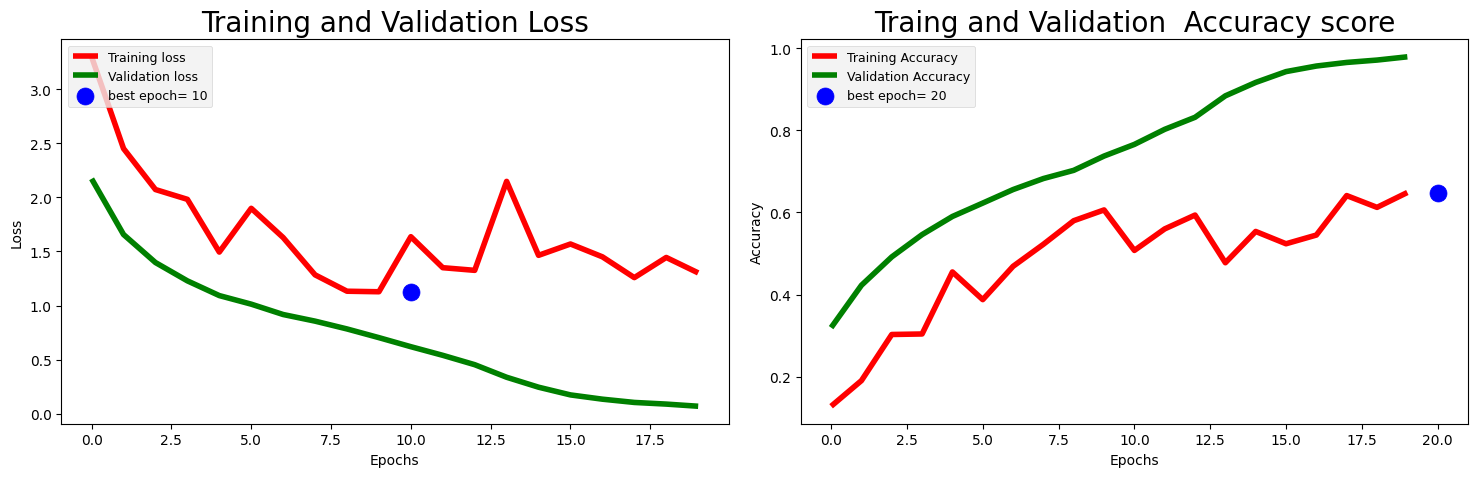

In [ ]:
visualize_training_results(history)

**Model 2(Data Augmentation):**

In [ ]:
# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2,1.2],
    fill_mode='nearest'
    )

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Create generators for loading the train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 6400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
# Define CNN model
model = Sequential()

model.add(Conv2D(32, 3, input_shape=input_shape, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, 3, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# early_stopping to prevent overfitting
early_stopping = [EarlyStopping(monitor='val_loss', patience=10),
                  ModelCheckpoint(filepath='/content/drive/MyDrive/skin_disorder_classifier2.h5',
                                  monitor='val_accuracy', save_best_only=True)
                  ]
# Train the model using the train and validation generators
history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // train_generator.batch_size,
          epochs=epochs,
          validation_data=val_generator,
          validation_steps=val_generator.samples // val_generator.batch_size,
          callbacks = early_stopping
          )

Epoch 1/40
200/200 [==============================] - 150s 631ms/step - loss: 2.1219 - accuracy: 0.3086 - val_loss: 2.3447 - val_accuracy: 0.1850
Epoch 2/40
200/200 [==============================] - 114s 569ms/step - loss: 1.5693 - accuracy: 0.4466 - val_loss: 1.7570 - val_accuracy: 0.3125
Epoch 3/40
200/200 [==============================] - 128s 638ms/step - loss: 1.3168 - accuracy: 0.5223 - val_loss: 1.8337 - val_accuracy: 0.3237
Epoch 4/40
200/200 [==============================] - 118s 589ms/step - loss: 1.1318 - accuracy: 0.5800 - val_loss: 1.7469 - val_accuracy: 0.3812
Epoch 5/40
200/200 [==============================] - 120s 597ms/step - loss: 1.0029 - accuracy: 0.6233 - val_loss: 1.2640 - val_accuracy: 0.4975
Epoch 6/40
200/200 [==============================] - 129s 643ms/step - loss: 0.9256 - accuracy: 0.6509 - val_loss: 1.0318 - val_accuracy: 0.6150
Epoch 7/40
200/200 [==============================] - 118s 590ms/step - loss: 0.8491 - accuracy: 0.6789 - val_loss: 1.7821 -

In [ ]:
#test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

25/25 [==============================] - 11s 427ms/step - loss: 1.6772 - accuracy: 0.6025
Test accuracy: 0.6025000214576721


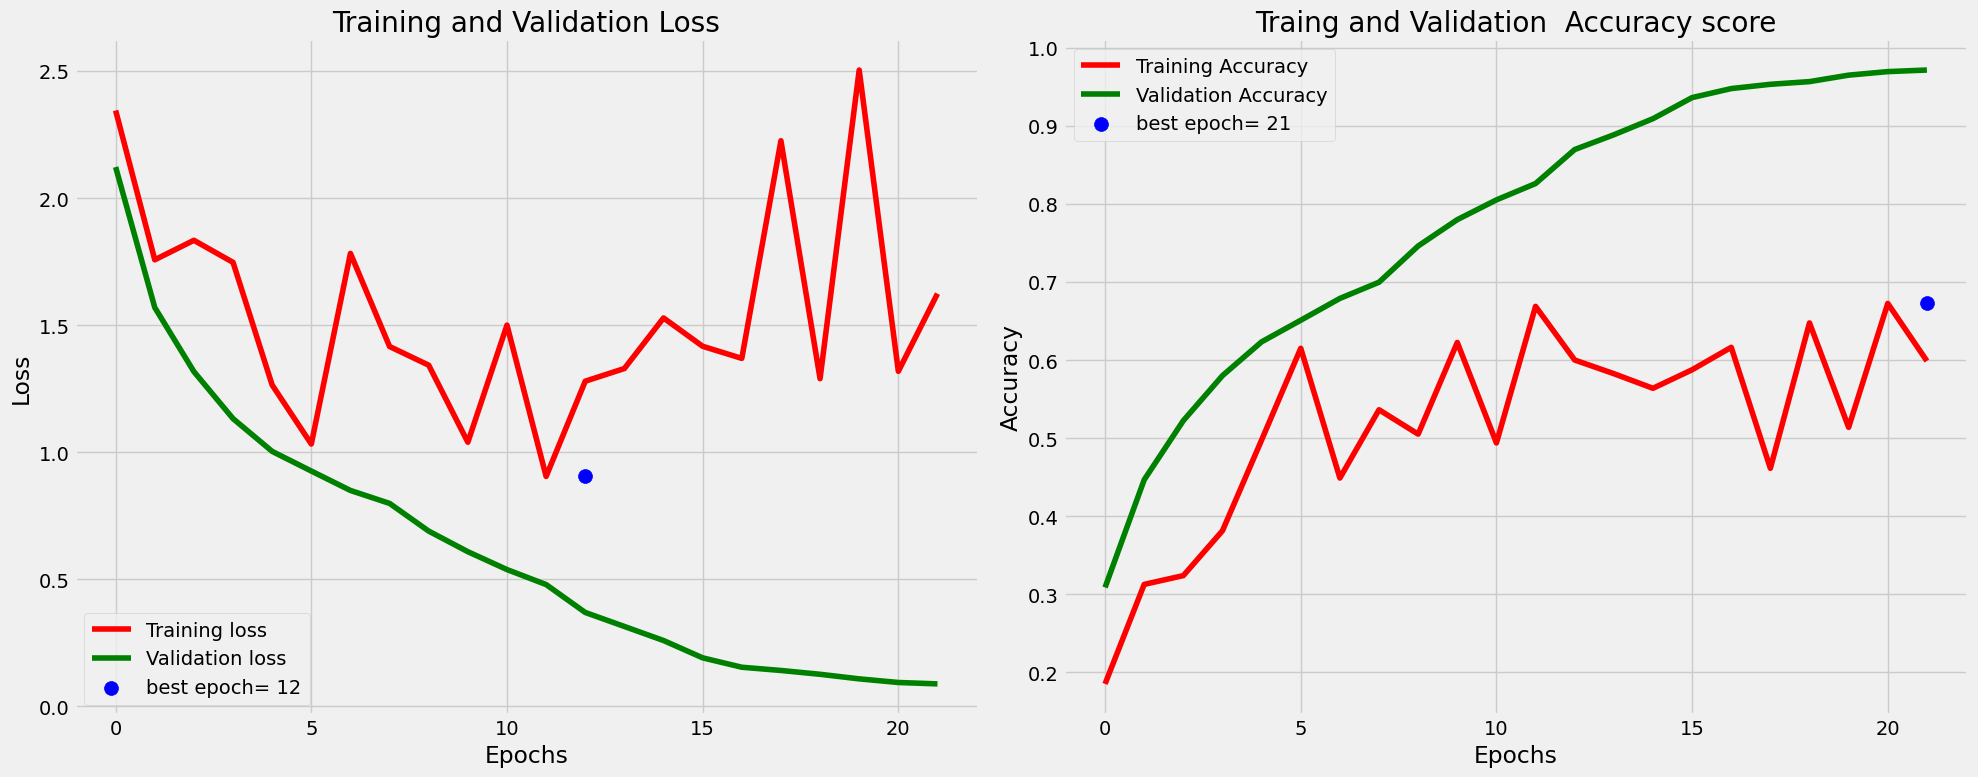

In [ ]:
# visualize loss and accuracy
visualize_training_results(history)

**Model 3(EfficientNetB2):**

In [ ]:
# TypeError: Unable to serialize [2.0896919 2.1128857 2.1081853] to JSON. Unrecognized type <class 'tensorflow.python.framework.ops.EagerTensor'>.
# Due to the error above, we need to install tensor flow version 2.9.2 for the EfficientNet model to be able to run

In [ ]:
# pip uninstall tensorflow
# pip install tensorflow==2.9.2
print(tf. __version__)

2.9.2


In [ ]:
# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range = [0.2, 1.2]
    )

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Create generators for loading the train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 6400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


**_Define function to print text in RGB foreground and background colors_**

* The function is used to print text in different colors
* It takes three arguments: the text message, foreground color, and background color
* The foreground and background colors are specified as tuples of three numbers representing the RGB values
* The function uses escape sequences to set the text color and background color before printing the message
* The function then resets the print color to default after printing the message

In [ ]:
def print_in_color(txt_msg,fore_tupple,back_tupple,):
    #prints the text_msg in the foreground color specified by fore_tupple with the background specified by back_tupple
    #text_msg is the text, fore_tupple is foregroud color tupple (r,g,b), back_tupple is background tupple (r,g,b)
    rf,gf,bf=fore_tupple
    rb,gb,bb=back_tupple
    msg='{0}' + txt_msg
    mat='\33[38;2;' + str(rf) +';' + str(gf) + ';' + str(bf) + ';48;2;' + str(rb) + ';' +str(gb) + ';' + str(bb) +'m'
    print(msg .format(mat), flush=True)
    print('\33[0m', flush=True) # returns default print color to back to black
    return

**_Create a subclass of callbacks to control learning rate and print training results for each epoch_**

The custom callback function used in the model combines early stopping, reduce learning rate on plateau, and model checkpoint, and is designed to improve training efficiency and prevent overfitting. In addition,the function provides a summary of model's performance at each epoch, allows for early stopping, and always returns the best-performing model. The function also takes several customizable parameters to suit individual needs.

In [ ]:
class LRA(keras.callbacks.Callback):
    def __init__(self,model, base_model, patience,stop_patience, threshold, factor, dwell, batches, initial_epoch,epochs, ask_epoch):
        super(LRA, self).__init__()
        self.model=model
        self.base_model=base_model
        self.patience=patience # specifies how many epochs without improvement before learning rate is adjusted
        self.stop_patience=stop_patience # specifies how many times to adjust lr without improvement to stop training
        self.threshold=threshold # specifies training accuracy threshold when lr will be adjusted based on validation loss
        self.factor=factor # factor by which to reduce the learning rate
        self.dwell=dwell
        self.batches=batches # number of training batch to runn per epoch
        self.initial_epoch=initial_epoch
        self.epochs=epochs
        self.ask_epoch=ask_epoch
        self.ask_epoch_initial=ask_epoch # save this value to restore if restarting training
        # callback variables
        self.count=0 # how many times lr has been reduced without improvement
        self.stop_count=0
        self.best_epoch=1   # epoch with the lowest loss
        self.initial_lr=float(tf.keras.backend.get_value(model.optimizer.lr)) # get the initiallearning rate and save it
        self.highest_tracc=0.0 # set highest training accuracy to 0 initially
        self.lowest_vloss=np.inf # set lowest validation loss to infinity initially
        self.best_weights=self.model.get_weights() # set best weights to model's initial weights
        self.initial_weights=self.model.get_weights()   # save initial weights if they have to get restored

    def on_train_begin(self, logs=None):
        if self.base_model != None:
            status=base_model.trainable
            if status:
                msg=' initializing callback starting train with base_model trainable'
            else:
                msg='initializing callback starting training with base_model not trainable'
        else:
            msg='initialing callback and starting training'
        print_in_color (msg, (244, 252, 3), (55,65,80))
        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
        print_in_color(msg, (244,252,3), (55,65,80))
        self.start_time= time.time()

    def on_train_end(self, logs=None):
        stop_time=time.time()
        tr_duration= stop_time- self.start_time
        hours = tr_duration // 3600
        minutes = (tr_duration - (hours * 3600)) // 60
        seconds = tr_duration - ((hours * 3600) + (minutes * 60))

        self.model.set_weights(self.best_weights) # set the weights of the model to the best weights
        msg=f'Training is completed - model is set with weights from epoch {self.best_epoch} '
        print_in_color(msg, (0,255,0), (55,65,80))
        msg = f'training elapsed time was {str(hours)} hours, {minutes:4.1f} minutes, {seconds:4.2f} seconds)'
        print_in_color(msg, (0,255,0), (55,65,80))

    def on_train_batch_end(self, batch, logs=None):
        acc=logs.get('accuracy')* 100  # get training accuracy
        loss=logs.get('loss')
        msg='{0:20s}processing batch {1:4s} of {2:5s} accuracy= {3:8.3f}  loss: {4:8.5f}'.format(' ', str(batch), str(self.batches), acc, loss)
        print(msg, '\r', end='') # prints over on the same line to show running batch count

    def on_epoch_begin(self,epoch, logs=None):
        self.now= time.time()

    def on_epoch_end(self, epoch, logs=None):  # method runs on the end of each epoch
        later=time.time()
        duration=later-self.now
        lr=float(tf.keras.backend.get_value(self.model.optimizer.lr)) # get the current learning rate
        current_lr=lr
        v_loss=logs.get('val_loss')  # get the validation loss for this epoch
        acc=logs.get('accuracy')  # get training accuracy
        v_acc=logs.get('val_accuracy')
        loss=logs.get('loss')
        if acc < self.threshold: # if training accuracy is below threshold adjust lr based on training accuracy
            monitor='accuracy'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (acc-self.highest_tracc )*100/self.highest_tracc
            if acc>self.highest_tracc: # training accuracy improved in the epoch
                self.highest_tracc=acc # set new highest training accuracy
                self.best_weights=self.model.get_weights() # traing accuracy improved so save the weights
                self.stop_count=0 # set stop counter to 0
                if v_loss<self.lowest_vloss:
                    self.lowest_vloss=v_loss
                color= (0,255,0)
                self.best_epoch=epoch + 1  # set the value of best epoch for this epoch
            else:
                # training accuracy did not improve check if this has happened for patience number of epochs
                # if so adjust learning rate
                if self.count>=self.patience -1: # lr should be adjusted
                    color=(245, 170, 66)
                    lr= lr* self.factor # adjust the learning by factor
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    self.count=0 # reset the count to 0
                    self.stop_count=self.stop_count + 1 # count the number of consecutive lr adjustments
                    self.count=0 # reset counter
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                    else:
                        if v_loss<self.lowest_vloss:
                            self.lowest_vloss=v_loss
                else:
                    self.count=self.count +1 # increment patience counter
        else: # training accuracy is above threshold so adjust learning rate based on validation loss
            monitor='val_loss'
            if epoch ==0:
                pimprov=0.0
            else:
                pimprov= (self.lowest_vloss- v_loss )*100/self.lowest_vloss
            if v_loss< self.lowest_vloss: # check if the validation loss improved
                self.lowest_vloss=v_loss # replace lowest validation loss with new validation loss
                self.best_weights=self.model.get_weights() # validation loss improved so save the weights
                self.count=0 # reset count since validation loss improved
                self.stop_count=0
                color=(0,255,0)
                self.best_epoch=epoch + 1 # set the value of the best epoch to this epoch
            else: # validation loss did not improve
                if self.count>=self.patience-1: # need to adjust lr
                    color=(245, 170, 66)
                    lr=lr * self.factor # adjust the learning rate
                    self.stop_count=self.stop_count + 1 # increment stop counter because lr was adjusted
                    self.count=0 # reset counter
                    tf.keras.backend.set_value(self.model.optimizer.lr, lr) # set the learning rate in the optimizer
                    if self.dwell:
                        self.model.set_weights(self.best_weights) # return to better point in N space
                else:
                    self.count =self.count +1 # increment the patience counter
                if acc>self.highest_tracc:
                    self.highest_tracc= acc
        msg=f'{str(epoch+1):^3s}/{str(self.epochs):4s} {loss:^9.3f}{acc*100:^9.3f}{v_loss:^9.5f}{v_acc*100:^9.3f}{current_lr:^9.5f}{lr:^9.5f}{monitor:^11s}{pimprov:^10.2f}{duration:^8.2f}'
        print_in_color (msg,color, (55,65,80))
        if self.stop_count> self.stop_patience - 1: # check if learning rate has been adjusted stop_count times with no improvement
            msg=f' training has been halted at epoch {epoch + 1} after {self.stop_patience} adjustments of learning rate with no improvement'
            print_in_color(msg, (0,255,255), (55,65,80))
            self.model.stop_training = True # stop training
        else:
            if self.ask_epoch !=None:
                if epoch + 1 >= self.ask_epoch:
                    if base_model.trainable:
                        msg='enter H to halt  or an integer for number of epochs to run then ask again'
                    else:
                        msg='enter H to halt ,F to fine tune model, or an integer for number of epochs to run then ask again'
                    print_in_color(msg, (0,255,255), (55,65,80))
                    ans=input('')
                    if ans=='H' or ans=='h':
                        msg=f'training has been halted at epoch {epoch + 1} due to user input'
                        print_in_color(msg, (0,255,255), (55,65,80))
                        self.model.stop_training = True # stop training
                    elif ans == 'F' or ans=='f':
                        if base_model.trainable:
                            msg='base_model is already set as trainable'
                        else:
                            msg='setting base_model as trainable for fine tuning of model'
                            self.base_model.trainable=True
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))
                        self.count=0
                        self.stop_count=0
                        self.ask_epoch = epoch + 1 + self.ask_epoch_initial

                    else:
                        ans=int(ans)
                        self.ask_epoch +=ans
                        msg=f' training will continue until epoch ' + str(self.ask_epoch)
                        print_in_color(msg, (0, 255,255), (55,65,80))
                        msg='{0:^8s}{1:^10s}{2:^9s}{3:^9s}{4:^9s}{5:^9s}{6:^9s}{7:^10s}{8:10s}{9:^8s}'.format('Epoch', 'Loss', 'Accuracy',
                                                                                              'V_loss','V_acc', 'LR', 'Next LR', 'Monitor','% Improv', 'Duration')
                        print_in_color(msg, (244,252,3), (55,65,80))

In [ ]:
# Create an instance of the EfficientNetB2 model
base_model = EfficientNetB2(include_top=False, weights="imagenet", input_shape=input_shape, pooling = 'max')

# Added a normalzation
x = base_model.output
x = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001 )(x)

# Added a fully connected layer with 256 hidden units, regularizers and ReLU activation
x = Dense(256, kernel_regularizer = regularizers.l2(l = 0.016),activity_regularizer=regularizers.l1(0.006),
                bias_regularizer=regularizers.l1(0.006) ,activation='relu')(x)

# Added a dropout layer to prevent overfitting
x = Dropout(0.45, seed=123)(x)

# The final softmax layer with 8 output units
output = Dense(8, activation='softmax')(x)

# created the model with the base model and the fully connected layers
model_EfficientNetB2 = Model(inputs=base_model.input, outputs=output)

# compile the model with the Adam optimizer
model_EfficientNetB2.compile(optimizer=Adamax(learning_rate=.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
epochs =40
patience= 1 # number of epochs to wait to adjust learning_rate if monitored value does not improve
stop_patience =3 # number of epochs to wait before stopping training if monitored value does not improve
threshold=.9 # if train accuracy is < threshhold adjust monitor accuracy, else monitor validation loss
factor=.5 # factor to reduce learning_rate by
dwell=True # if True and monitored metric does not improve on current epoch set  modelweights back to weights of previous epoch
freeze=False # if true free weights of  the base model
ask_epoch=20 # number of epochs to run before asking if you want to halt training
batches= train_generator.samples // train_generator.batch_size
callbacks=[LRA(model= model_EfficientNetB2, base_model= base_model, patience=patience, stop_patience=stop_patience, threshold=threshold,
                   factor=factor, dwell=dwell, batches=batches,initial_epoch=0,epochs=epochs, ask_epoch=ask_epoch )]


In [ ]:
history_EfficientNetB2 = model_EfficientNetB2.fit(train_generator,
                                 epochs=epochs,
                                 verbose=0,
                                 callbacks=callbacks,
                                validation_data=val_generator,
                                 shuffle=False,
                                 initial_epoch=0)

 initializing callback starting train with base_model trainable

 Epoch     Loss   Accuracy  V_loss    V_acc     LR     Next LR  Monitor  % Improv  Duration

 1 /40     7.839   47.891   7.57303  14.125   0.00100  0.00100  accuracy     0.00    306.79 

 2 /40     5.221   66.953   5.72205  10.000   0.00100  0.00100  accuracy    39.80    289.82 

 3 /40     3.757   73.609   4.58298  16.625   0.00100  0.00100  accuracy     9.94    288.07 

 4 /40     2.701   78.203   3.81709  14.000   0.00100  0.00100  accuracy     6.24    291.09 

 5 /40     1.980   79.844   3.20592  13.625   0.00100  0.00100  accuracy     2.10    294.23 

 6 /40     1.455   83.547   2.90506  19.375   0.00100  0.00100  accuracy     4.64    294.39 

 7 /40     1.122   85.094   2.78819  14.625   0.00100  0.00100  accuracy     1.85    292.15 

 8 /40     0.918   86.266   2.58439  15.250   0.00100  0.00100  accuracy     1.38    289.27 

 9 /40     0.751   88.484   2.61003  16.625   0.00100  0.00100  accuracy     2.57    287.5

In [ ]:
# Saving model to drive
model_EfficientNetB2.save("/content/drive/MyDrive/skin_disorder_classifier_EfficientNetB2.h5")

In [ ]:
# Evaluate the model
test_loss, test_acc = model_EfficientNetB2.evaluate(test_generator, verbose=0)
print((f'Test Accuracy: {test_acc:.2f}'))

Test Accuracy: 0.88


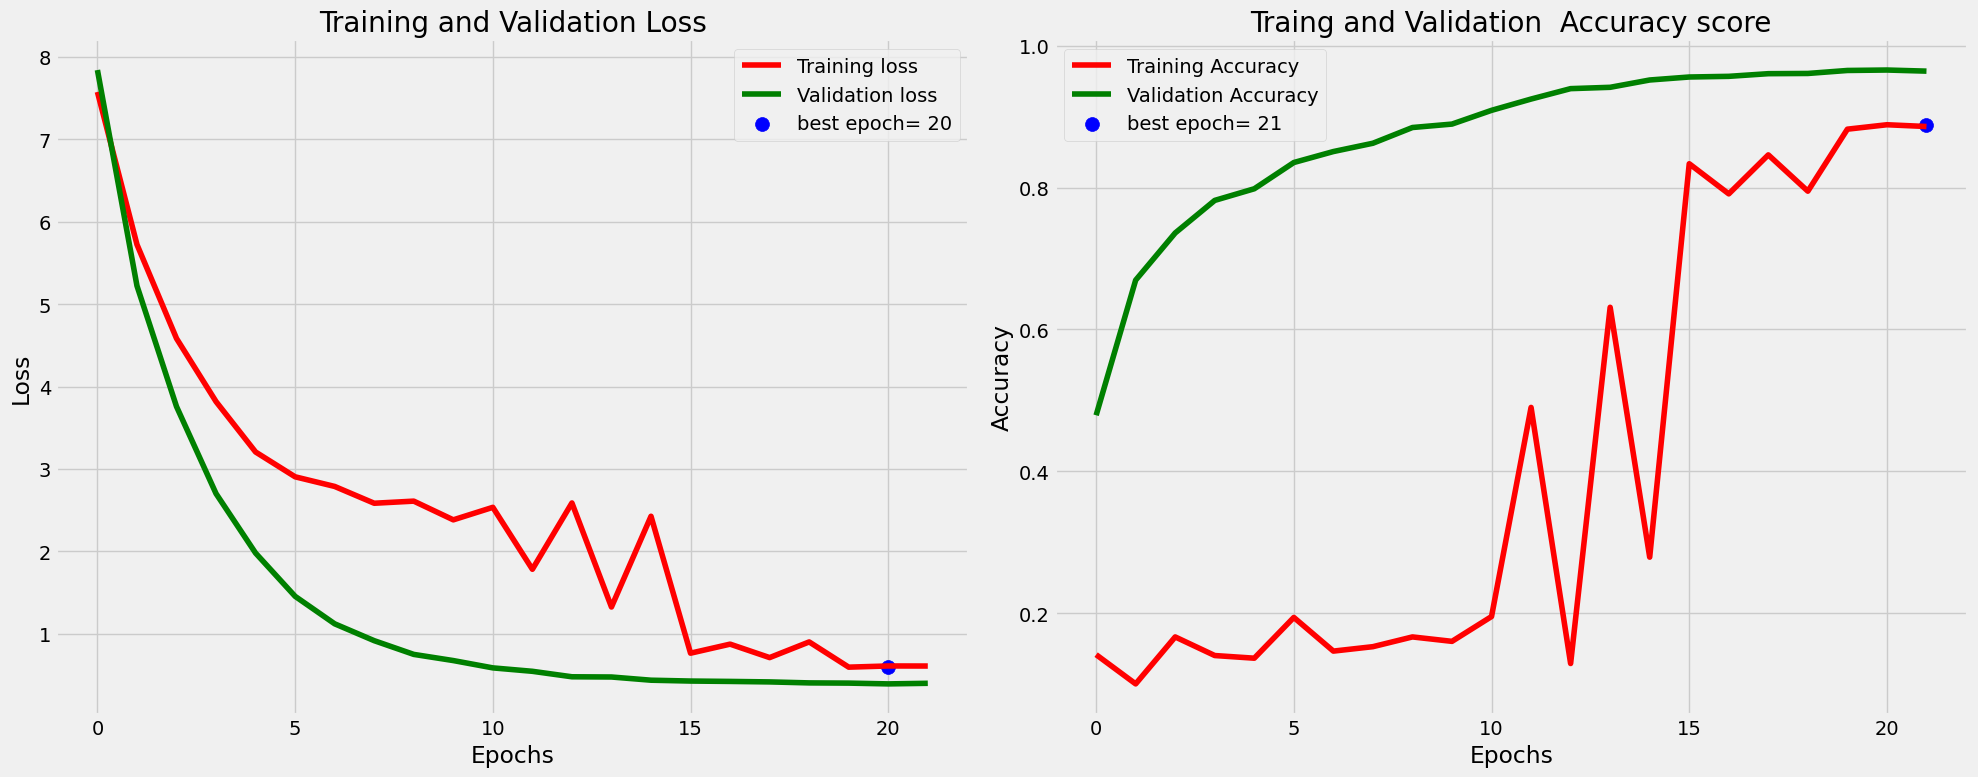

In [ ]:
# Visualizing the model's performance
visualize_training_results(history_EfficientNetB2)

**Model 4(VGG16)**

In [ ]:
# Create an instance of ImageDataGenerator for data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    brightness_range=[0.2,1.2]
    )

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
# Create generators for loading the train, validation, and test sets
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=input_shape[:2],
    batch_size=batch_size,
    class_mode='categorical')

Found 6400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [ ]:
# Load the pre-trained VGG16 model (excluding the top layers)
vgg16_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

58889256/58889256 [==============================] - 3s 0us/step


In [ ]:
# Freeze the weights of the pre-trained layers
for layer in vgg16_model.layers:
    layer.trainable = False

In [ ]:
# Add a new classifier on top of the pre-trained layers
model = Sequential()
model.add(vgg16_model)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(8, activation='softmax'))

In [ ]:
# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [ ]:
# Train the model using the train and validation generators
history = model.fit(train_generator,
          steps_per_epoch=len(train_generator),
          epochs=20,
          validation_data=val_generator,
          validation_steps=len(val_generator))


Epoch 1/20
200/200 [==============================] - 243s 1s/step - loss: 1.9324 - accuracy: 0.2095 - val_loss: 1.6353 - val_accuracy: 0.3075
Epoch 2/20
200/200 [==============================] - 233s 1s/step - loss: 1.7840 - accuracy: 0.2317 - val_loss: 1.5845 - val_accuracy: 0.3375
Epoch 3/20
200/200 [==============================] - 230s 1s/step - loss: 1.7656 - accuracy: 0.2222 - val_loss: 1.5319 - val_accuracy: 0.3438
Epoch 4/20
200/200 [==============================] - 230s 1s/step - loss: 1.7476 - accuracy: 0.2366 - val_loss: 1.5089 - val_accuracy: 0.3288
Epoch 5/20
200/200 [==============================] - 229s 1s/step - loss: 1.7260 - accuracy: 0.2495 - val_loss: 1.5235 - val_accuracy: 0.3388
Epoch 6/20
200/200 [==============================] - 229s 1s/step - loss: 1.7412 - accuracy: 0.2336 - val_loss: 1.4956 - val_accuracy: 0.2937
Epoch 7/20
200/200 [==============================] - 232s 1s/step - loss: 1.7309 - accuracy: 0.2334 - val_loss: 1.4627 - val_accuracy: 0.3288

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=len(test_generator))
print("Test accuracy:", test_acc)

67/67 [==============================] - 849s 13s/step - loss: 1.1702 - accuracy: 0.5155
Test accuracy: 0.5154929757118225


In [ ]:
# Saving model to drive
model_EfficientNetB2.save("/content/drive/MyDrive/skin_disease_classifier_VGG16.h5")

['/content/drive/MyDrive/skin_disease_classifier_VGG16']

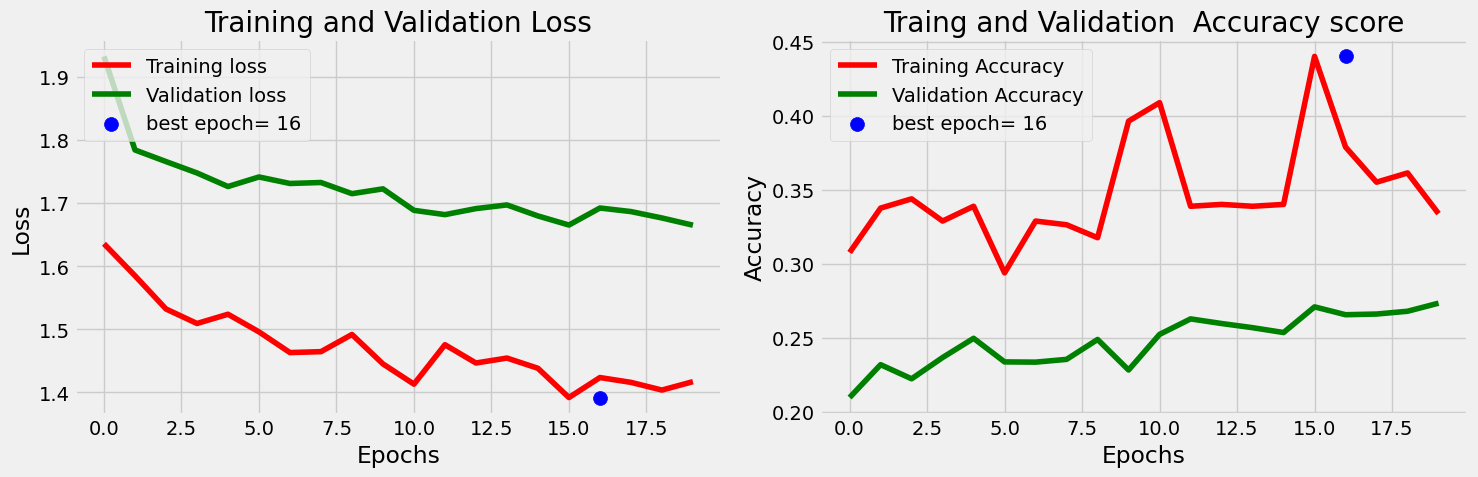

In [ ]:
visualize_training_results(history)

# **Evaluation**
Evaluation of the skin disease classifier model was based on its accuracy in predicting skin diseases from images. The model achieved an accuracy of 88% on the test set, indicating its potential for accurate diagnosis of skin diseases. However, the evaluation also revealed some limitations of the model, including its sensitivity to image quality and potential biases in the training dataset. These limitations suggest the need for further improvement and validation of the model before it can be applied in clinical settings. Overall, the evaluation highlights both the strengths and weaknesses of the model and provides insights for future development and refinement.

# **Conclusion**

The skin disease classifier model has shown promising results in accurately identifying various skin diseases with an 88% accuracy rate on the test set. The integration of this model into a website will provides an accessible and efficient platform for users to upload photos of their skin diseases and receive accurate diagnoses. However, the model is not without its limitations, including the potential for bias in the training dataset and variability in image quality uploaded by users. Future work includes expanding the dataset and improving the model's ability to identify other skin conditions, as well as conducting real-world validation studies and integrating the model with telemedicine technologies. Despite these limitations, the model represents a significant step forward in the field of dermatology and has the potential to improve access to healthcare for individuals with skin conditions.

> ## **Limitations**

* **Limited dataset:** The model was trained on a limited dataset, which may not be representative of all skin disease and skin types.
* **Lack of diversity:** Skin diseases can present differently in different people based on factors such as age, skin type, and ethnicity.Potential bias in the dataset used for training the model, which may lead to inaccurate predictions for certain demographics or skin types.
* **Dependence on image quality:** The model's perfomance may vary depending on the quality of images uploaded by users. Images that are blurry, poorly lit, or not centered properly may not be accurately classified by the model.
* **Human error:** The accuracy of the model may also be affected by human error, such as mislabeling or misdiagnosing the skin disease images in the dataset.


> ## **Recommendations**

* Collect more diverse and high-quality  skin disease images from different populations and sources to improve the model's ability to generalize to new data.
* Incorporate expert knowledge  from dermatologists or other medical professionals to verify and help label and diagnose the skin disease images in the dataset.

* Incorporate additional metrics such as precision, recall, and F1 score to evaluate the model's performance.

* Investigate the potential of incorporating additional data sources such as patient history and clinical data to improve the accuracy of the diagnosis.

> ## **Future Work**

* **Real-world validation:** Real-world validation studies can be conducted to evaluate the model's performance in clinical settings and to assess its impact on patient outcomes.
* **Expand dataset:** Expanding the dataset with more diverse skin types, demographics, and skin conditions can improve the model's generalizability and reduce potential biases.
* **Expand to other skin conditions:** The model can be further developed to identify a broader range of skin conditions beyond the current scope of skin diseases, such as wounds. This would increase the versatility and usefulness of the model for both patients and healthcare professionals.
* **Explainable AI:** Implementing explainable AI techniques can help clinicians and patients understand the model's decision-making process, increasing trust and transparency in the model's predictions.
* **Integrate model with telemedicine technologies:** The model can also be integrated with telemedicine technologies to enable remote diagnosis and treatment of skin diseases.